# Geometric Transformations

## Affine Transformations

An affine transformation is a fundamental concept in image processing used to represent various geometric operations. It combines linear transformations (matrix multiplication) with translations (vector addition) to achieve versatile effects {cite:p}`OpenCVDocumentation`:

1. **Rotations**: Employing linear transformations to rotate the image.
2. **Translations**: Achieved by adding a vector, effectively shifting the image.
3. **Scale Operations**: Applying linear transformations to resize the image.

At its core, an affine transformation describes the relationship between two images. This transformation is typically represented by a 2x3 matrix {cite:p}`OpenCVDocumentation`:

\begin{equation}
A = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}

We combine these matrices to form a 2x3 matrix:

\begin{equation}
M = \begin{bmatrix} A & B \end{bmatrix} = \begin{bmatrix} a_{00} & a_{01} & b_{00} \\ a_{10} & a_{11} & b_{10} \end{bmatrix}_{2 \times 3}
\end{equation}

To transform a 2D vector $X = \begin{bmatrix} x \\ y \end{bmatrix}$ using A and B, we can use:

\begin{equation}
T = A \cdot \begin{bmatrix} x \\ y \end{bmatrix} + B
\end{equation}

This results in:

\begin{equation}
T = \begin{bmatrix} a_{00}x + a_{01}y + b_{00} \\ a_{10}x + a_{11}y + b_{10} \end{bmatrix}
\end{equation}

Affine transformations provide a powerful framework for image manipulation, enabling operations such as rotation, translation, scaling, and more. They form the basis for transforming images efficiently and systematically.

### How to Derive an Affine Transformation?

An Affine Transformation represents a fundamental relationship between two images. This connection can be established through different means, generally falling into two categories {cite:p}`OpenCVDocumentation`:

1. **When We Know Both X and T**: In this scenario, we possess knowledge about both sets of points, X and T, and we are aware that these points are related. Our objective is to find the transformation matrix, denoted as M.

2. **When We Know M and X**: If we have information about the transformation matrix M and the original set of points X, we can easily obtain the transformed set of points T by applying the transformation equation T = M⋅X. This information for M can either be explicit, represented as a 2-by-3 matrix, or it may be inferred from a geometric relationship between points.

To elucidate the concept further, let's delve into the scenario described in point (b). When M is the relationship that connects two images, we can analyze the simplest case where M relates three distinct points in both images. Consider the visual representation below {cite:p}`OpenCVDocumentation`:

```{figure} Warp_Affine_0.png
---
width: 500px
align: left
---
Image courtesy of {cite:p}`OpenCVDocumentation`.
```

In the image, points 1, 2, and 3 form a triangle in image 1. This same triangle, when mapped into image 2 through the Affine Transformation, undergoes a noticeable change. By determining the Affine Transformation using these three chosen points (which can be selected as needed), we can establish this discovered relationship for all pixels within an image.

This methodology empowers us to apply the same transformation across the entire image, enabling geometric alterations such as rotations, translations, and scaling. Understanding this relationship between points and the transformation matrix forms the foundation for systematically manipulating images with Affine Transformations.

### getAffineTransform

The function `cv2.getAffineTransform(src, dst)` is a part of the OpenCV library in Python, and it's used to calculate the Affine Transformation matrix that maps points from one plane (source, `src`) to another plane (destination, `dst`). The Affine Transformation is a linear transformation that involves rotation, translation, and scaling. This transformation matrix can then be used to warp or transform images, shapes, or sets of points from the source plane to the destination plane {cite:p}`opencv_library, OpenCVDocumentation`.

Here's a breakdown of the function parameters and return value:

1. `src`: The source points, which is a 3x2 array of floating-point coordinates representing the original points in the source plane. It should contain three points (rows), each with two coordinates (columns).

2. `dst`: The destination points, which is also a 3x2 array of floating-point coordinates. These represent the corresponding points in the destination plane. Just like the source points, it should contain three points with two coordinates each.

The function calculates the Affine Transformation matrix that best maps the source points to the destination points. This matrix is denoted by the return value `retval`, which is a 2x3 floating-point matrix representing the transformation. The `retval` matrix can be used for various purposes, such as warping images using `cv2.warpAffine()` or transforming sets of points.

To use the Affine Transformation matrix obtained from `cv2.getAffineTransform()`, you'll typically apply it to an image or points using the `cv2.warpAffine()` function, which performs the actual transformation. This function uses the calculated matrix to apply the transformation to the image or points.

In summary, `cv2.getAffineTransform()` is a crucial step in preparing to apply an Affine Transformation to images or points in computer vision and image processing tasks.

<font color='Blue'><b>Example</b></font>:

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.datasets import load_sample_image

# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library
plt.rcParams.update({'font.family' : 'Calibri', 'axes.titlesize' : 16})  # Set font properties for plots
import cv2  # Import the OpenCV library

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        if grayscale:
            _ = ax[i].imshow(Images[i], 'gray')  # Display the image in grayscale
        else:
            _ = ax[i].imshow(Images[i])  # Display the image in color
        _ = ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        _ = ax[i].axis('off')  # Turn off axis
        _ = ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        _ = fig.suptitle(title, weight='bold', fontsize=18)  # Set main title if provided
    
    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

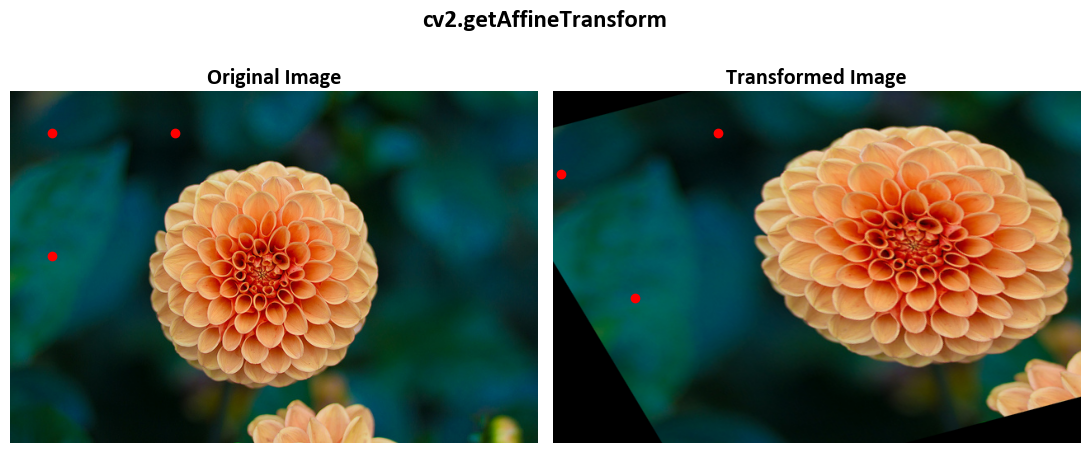

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an example image
Img = load_sample_image('flower.jpg')

# Define the source points (original triangle)
src_pts = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the destination points (how the triangle should be transformed)
dst_pts = np.float32([[10, 100], [200, 50], [100, 250]])

# Calculate the Affine Transformation matrix
affine_matrix = cv2.getAffineTransform(src_pts, dst_pts)

# Apply the Affine Transformation to the image
Out = cv2.warpAffine(Img, affine_matrix, (Img.shape[1], Img.shape[0]))

# Display the original and transformed images with titles
fig, ax = ImShow(Images = [Img, Out],
                 Names = ['Original Image', 'Transformed Image'],
                 title='cv2.getAffineTransform', grayscale=False)

# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:,0], src_pts[:,1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:,0], dst_pts[:,1], color='red')  # Mark destination points on the transformed image

This code demonstrates an image transformation using an Affine Transformation:

1. The necessary libraries are imported, including OpenCV (cv2) for image processing, NumPy for numerical operations, Matplotlib for visualization, and Scikit-learn's `load_sample_image` to load an example image.

2. A function `ImShow` is defined to display a pair of images side by side with titles. It takes a list of images, a list of image titles, an optional overall title, and a flag to set axis tight.

3. An example image ('flower.jpg') is loaded.

4. Source points (`src_pts`) and destination points (`dst_pts`) are defined to specify the geometric transformation, specifically an Affine Transformation. These points define the correspondence between a triangle in the original image and how it should appear in the transformed image.

5. The Affine Transformation matrix (`affine_matrix`) is calculated using the source and destination points.

6. The Affine Transformation is applied to the original image, resulting in the transformed image (`result`).

### Image Wrap

The function you're referring to, `cv2.warpAffine()`, is part of the OpenCV library, which is a popular computer vision and image processing library in Python. This specific function is used for geometric image transformations, particularly affine transformations. Let's break down the parameters and its purpose:

```python
cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
```

Here's what each parameter does:

1. `src`: This is the input image, which is the source image you want to apply the transformation to. It should be a NumPy array (image) in most cases.

2. `M`: This parameter represents the transformation matrix. It's a 2x3 matrix that defines the affine transformation. The matrix includes parameters like scaling, rotation, translation, and shearing. The transformation matrix `M` is used to specify how each pixel in the source image should be mapped to the destination image.

3. `dsize`: This is the size (width and height) of the output image (destination image) you want to create after applying the transformation. It's specified as a tuple (width, height).

4. `dst` (optional): This is the output image where the transformed image will be stored. If not provided, a new image will be created to store the result.

5. `flags` (optional): This parameter specifies the interpolation method to be used during the transformation. Different methods can be used to determine the pixel values of the output image at locations that do not exactly map to locations in the source image.

6. `borderMode` (optional): This parameter determines how to handle pixels that fall outside the boundaries of the source image. It defines the border mode.

7. `borderValue` (optional): When a pixel is outside the source image boundaries, this parameter specifies the value that should be used for the pixel.

8. `→ dst`: This indicates that the function returns the destination image, which contains the result of the affine transformation.

<font color='Blue'><b>Example</b></font>:

We utilize the [image dataset function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) from scikit-learn to showcase fundamental image manipulation operations using OpenCV.

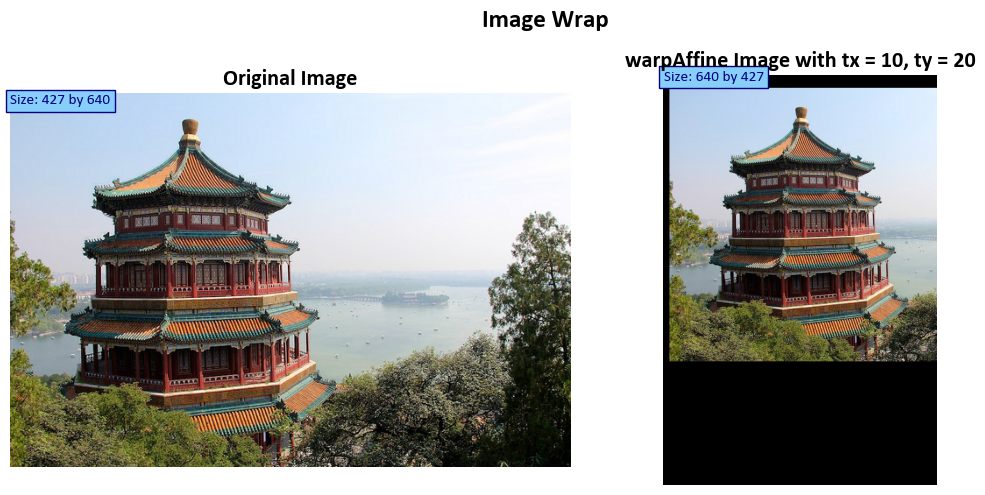

In [3]:
# Import necessary libraries
import numpy as np
import cv2
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load the sample image
Img = load_sample_image('china.jpg')

# Define a function to create a 2D translation matrix
def map_matrix(tx, ty):
    # Create a 2x3 transformation matrix with translation values (tx, ty)
    M = np.eye(3, dtype=float)[:2, :]
    M[:, -1] = [tx, ty]
    return M

# Apply the affine transformation to the image using warpAffine
# with translation values tx = 10 and ty = 20
Out = cv2.warpAffine(Img, map_matrix(10, 20), Img.shape[:2])

# Display the original and transformed images with titles
fig, ax = ImShow([Img, Out], 
                 ['Original Image', 'warpAffine Image with tx = 10, ty = 20'],
                 title='Image Wrap')
    
# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s='Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s='Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

This code demonstrates how to perform a 2D translation on an image using the OpenCV library in Python. It uses the warpAffine function to apply an affine transformation to the input image, resulting in a translated version of the original image. The code then displays both the original and transformed images side by side in a visualization using Matplotlib.

Here's a step-by-step breakdown of the code:

1. Import necessary libraries:
   - `numpy` (as `np`): For numerical operations.
   - `cv2`: OpenCV, a computer vision library, for image manipulation.
   - `load_sample_image` from `sklearn.datasets`: To load a sample image (in this case, 'china.jpg').
   - `matplotlib.pyplot` (as `plt`): For visualization.
   - `matplotlib.font_manager.FontProperties`: For setting font properties (although the 'font' variable is not defined in the code).

2. Load the sample image:
   - The sample image 'china.jpg' is loaded using the `load_sample_image` function.

3. Define a function to create a 2D translation matrix:
   - The `map_matrix` function generates a 2x3 transformation matrix for translation with given translation values (tx, ty).

4. Apply the affine transformation to the image:
   - The `cv2.warpAffine` function is used to apply the transformation matrix generated by `map_matrix` to the input image with translation values `tx = 10` and `ty = 20`. The result is stored in the `Out` variable.


The code provides a clear and visually appealing representation of the original image and its translation with the specified translation values (tx = 10, ty = 20). The resulting images, along with their sizes, are displayed side by side.

<font color='Blue'><b>Example</b></font>:

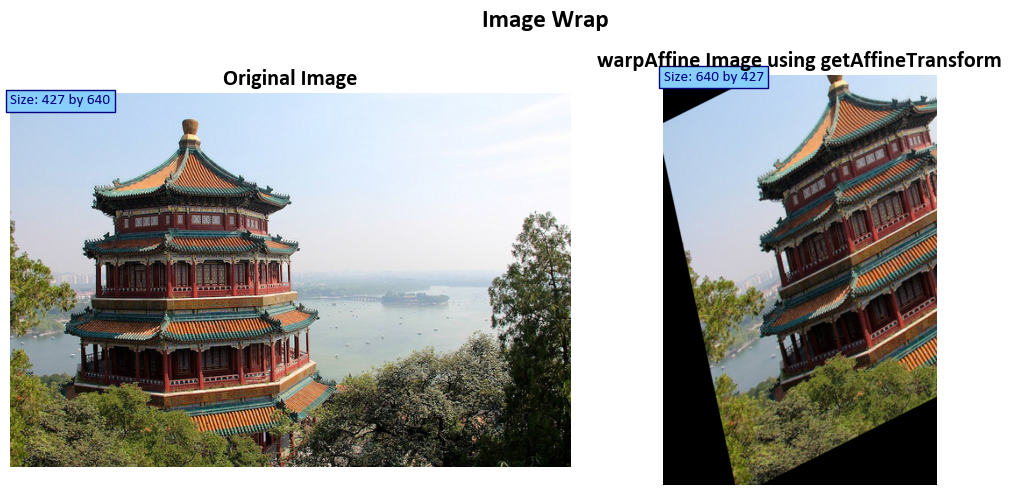

In [4]:
# Define source and destination points for the affine transformation
pts1 = np.float32([[10, 20], [150, 50], [50, 150]])  # Source points
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])  # Destination points

# Get the affine transformation matrix using the source and destination points
M = cv2.getAffineTransform(pts1, pts2)  # Computes the transformation matrix
del pts1, pts2  # Clean up, we no longer need the points

# Load the sample image
Img = load_sample_image('china.jpg')
                        
# Apply the affine transformation to the image using warpAffine
Out = cv2.warpAffine(Img, M, Img.shape[:2])  # Transformed image

fig, ax = ImShow([Img, Out],
                 ['Original Image', 'warpAffine Image using getAffineTransform'],
                 title='Image Wrap')

# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s='Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s='Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))


This code demonstrates the application of an affine transformation on an image using OpenCV. Here's a detailed breakdown of the code:

1. **Define Source and Destination Points**: Two sets of points, `pts1` (source points) and `pts2` (destination points), are defined. These points represent corresponding locations in the original and transformed images that will be used to calculate the affine transformation.

2. **Compute Affine Transformation Matrix**: The `cv2.getAffineTransform` function computes the 2x3 affine transformation matrix `M` that maps the source points to the destination points. This matrix represents the geometric transformation required to achieve the desired translation.

3. **Apply Affine Transformation**: The `cv2.warpAffine` function is used to apply the computed transformation matrix `M` to the input image (`Img`). This results in the transformed image (`Out`) after the specified affine translation.

4. **Visualize Original and Transformed Images**: A Matplotlib figure with two subplots is created. The original image (`Img`) is displayed in the first subplot, and the transformed image (`Out`) is displayed in the second subplot.

## Resize

## Resizing Images with OpenCV

The `resize` function in OpenCV is a versatile tool for adjusting the size of images, whether making them smaller or larger. It offers several options for defining the output size or using scaling factors to control the resizing process, providing the flexibility needed for various image manipulation tasks {cite:p}`opencv_library, OpenCVDocumentation`.

**Key Concepts:**

The `resize` function is essential for handling image dimensions. Here's a breakdown of its capabilities:

1. **Resizing an Image:**
   The primary purpose of `resize` is to change the size of an image. This can involve reducing or increasing the image's dimensions. The function allows explicit size specification or resizing based on scaling factors (`fx` and `fy`). Importantly, the initial type or size of the output image (`dst`) is not used. Instead, it's determined based on the source image (`src`), the desired output size (`dsize`), and the specified scaling factors.

2. **Explicit Output Size:**
   If you want to resize `src` to fit a pre-created destination image `dst`, you can achieve this by calling the function as follows:
   ```python
   resize(src, dst, dst.size(), 0, 0, interpolation)
   ```
   Here, `dsize` is set to match the size of `dst`, and the scaling factors `fx` and `fy` are automatically computed based on that.

3. **Using Scaling Factors:**
   You can also use scaling factors to control the resizing process. For instance, to decrease the size of the image by a factor of 2 in both the horizontal and vertical directions (decimation), you can use the following approach:
   ```python
   resize(src, dst, Size(), 0.5, 0.5, interpolation)
   ```
   Here, `fx` and `fy` are explicitly specified, and the function calculates the destination image size based on these factors.

4. **Selecting Interpolation:**
   When shrinking an image, the `INTER_AREA` interpolation method is recommended for the best results in terms of image quality. On the other hand, when enlarging an image, using `INTER_CUBIC` (higher quality, but slower) or `INTER_LINEAR` (faster but still acceptable quality) interpolation methods is generally recommended.

**Function Parameters:**

- `src`: The input image to be resized.
- `dst`: The output image. Its size can be explicitly set using `dsize`, or it can be determined automatically based on `src.size()`, `fx`, and `fy`. The type of `dst` matches the type of `src`.
- `dsize`: The desired output image size. If set to zero (None in Python), the function calculates it as:
  ```
  dsize = Size(round(fx * src.cols), round(fy * src.rows))
  ```
  Either `dsize` or both `fx` and `fy` must be non-zero.
- `fx`: The scaling factor along the horizontal axis (width). If `fx` is 0, it's computed as `(double)dsize.width / src.cols`.
- `fy`: The scaling factor along the vertical axis (height). If `fy` is 0, it's computed as `(double)dsize.height / src.rows`.
- `interpolation`: The interpolation method used during the resizing operation (e.g., `INTER_NEAREST`, `INTER_LINEAR`, `INTER_CUBIC`, `INTER_LANCZOS4`).

The `resize` function allows you to resize images while maintaining control over the output size and selecting appropriate interpolation methods to achieve the desired quality.

**Syntax:**

```python
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
```

Here's what each parameter does:

1. `src`: The input image that you want to resize. It should be a NumPy array (image) in most cases.

2. `dsize`: The desired size (width and height) of the output image. It's specified as a tuple (width, height). If you provide this parameter, the `fx` and `fy` parameters (scaling factors) are ignored.

3. `dst` (optional): The output image where the resized image will be stored. If not provided, a new image will be created to store the result.

4. `fx` (optional): The scale factor along the horizontal axis (width) by which you want to resize the image. If you provide `fx`, the `dsize` parameter is ignored on that axis.

5. `fy` (optional): The scale factor along the vertical axis (height) by which you want to resize the image. If you provide `fy`, the `dsize` parameter is ignored on that axis.

6. `interpolation` (optional): The interpolation method to be used during the resizing operation. Interpolation determines how pixel values are computed for the output image based on the input image. Common interpolation methods include:

   - `cv2.INTER_NEAREST`: Nearest-neighbor interpolation (fast but may produce blocky results).
   - `cv2.INTER_LINEAR`: Bilinear interpolation (good for most general-purpose resizing).
   - `cv2.INTER_CUBIC`: Bicubic interpolation (better quality, but slower).
   - `cv2.INTER_LANCZOS4`: Lanczos interpolation (high-quality but slower).

The `cv2.resize()` function resizes the input image based on the specified size or scaling factors and the chosen interpolation method. The function returns the resized image, and if you provided the `dst` parameter, the resized image is stored in the `dst` array; otherwise, a new image is created and returned. The `dst` parameter allows you to reuse an existing image array for efficiency.

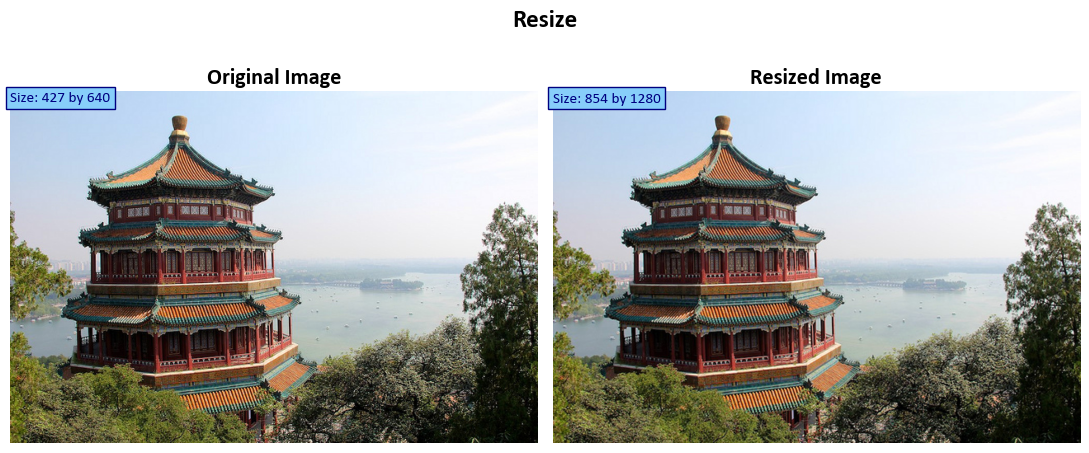

In [5]:
# Load the sample image
Img = load_sample_image('china.jpg')
                        
# Resize the original image using cubic interpolation
Out = cv2.resize(Img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

fig, ax = ImShow([Img, Out], ['Original Image', 'Resized Image'], title='Resize')

# Add text indicating the size of the original and resized images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s='Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s='Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

This code resizes the original image using cubic interpolation, creating a larger version of the image (`Out`). The original and resized images are displayed side by side in a Matplotlib figure, with annotations indicating the sizes of both images. The code also includes aesthetic adjustments, such as turning off axes and setting the aspect ratio to 1 for both subplots.

## Warp Perspective

The `cv2.warpPerspective()` function in the Python OpenCV library is a powerful tool used for performing perspective transformations on an input image. These transformations allow you to change the perspective view of an object within an image, simulating effects like changing the viewpoint or correcting for distortions caused by the camera's perspective. The primary purpose of this function is to apply a given 3x3 transformation matrix to the input image, resulting in a transformed output image {cite:p}`opencv_library, OpenCVDocumentation`.

### Perspective Transformation

Perspective transformations are essential for various computer vision tasks, including image rectification, object recognition, and more. They involve manipulating the positions of points in an image, effectively warping the image based on a specified transformation matrix. This matrix, denoted as `M`,
\begin{equation}
M = \begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \\M_{31} & M_{32} & M_{33} \end{bmatrix}
\end{equation}

describes how the points in the source image (`src`) should be transformed to obtain their corresponding positions in the destination image (`dst`).

The transformation is defined by the following equation:

\begin{equation}
\texttt{dst} (x,y) = \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} , \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )
\end{equation}

When the flag `WARP_INVERSE_MAP` is set, the function uses the inverse of the transformation matrix for the calculation. Otherwise, the transformation is inverted using the `invert` function before being applied. The function does not operate in-place; it generates a new transformed image as the output.

### Parameters

Here's a detailed explanation of the parameters used in the `cv2.warpPerspective()` function:

- `src`: This parameter represents the input image you want to transform using the perspective transformation. It should be a numpy array, representing the image you wish to warp.

- `M`: The `M` parameter is a 3x3 transformation matrix that defines the perspective transformation. This matrix describes how the points in the source image (`src`) should be transformed to obtain the corresponding points in the destination image (`dst`).

- `dsize`: The `dsize` parameter specifies the size of the output image (`dst`). It is a tuple containing the width and height of the destination image. The transformed input image (`src`) will be resized to this size.

- `dst` (optional): The `dst` parameter serves as the output image where the result of the perspective transformation will be stored. If this parameter is not provided, a new image will be created to hold the transformed result.

- `flags` (optional): The `flags` parameter provides additional transformation options. It can be a combination of transformation flags, but it is often set to `cv2.INTER_LINEAR` for bilinear interpolation, which provides a good trade-off between speed and quality.

- `borderMode` (optional): The `borderMode` parameter specifies how the border of the output image (`dst`) should be filled. It can be set to different border modes, such as `cv2.BORDER_CONSTANT` or `cv2.BORDER_REPLICATE`, depending on the desired behavior.

- `borderValue` (optional): The `borderValue` parameter is used to specify the value used for padding if the `borderMode` is set to `cv2.BORDER_CONSTANT`.

### Function Signature

Here's the structure of the function signature:

```python
cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
```

### Usage and Importance

The `cv2.warpPerspective()` function is a fundamental component in many image processing pipelines. It enables handling perspective effects, correcting image distortions, and preparing images for further analysis or visualization. By understanding and utilizing perspective transformations, you can significantly enhance the capabilities of your computer vision applications.

For more detailed information and examples of using `warpPerspective`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#cv2.warpPerspective). This function is essential for tasks that require precise geometric adjustments in images, making it a valuable tool in various computer vision scenarios.

<font color='Blue'><b>Example</b></font>:

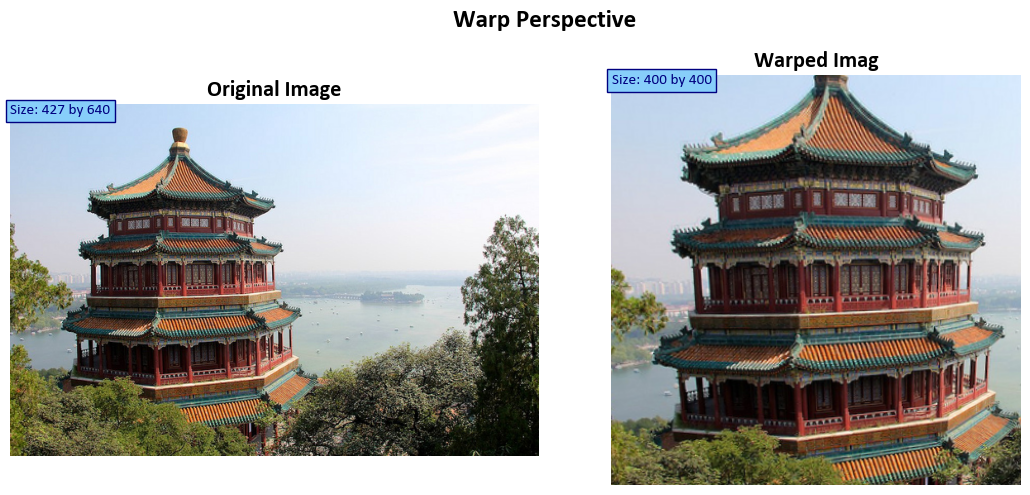

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the source and destination points for perspective transformation
pts1 = np.float32([[50, 60], [350, 50], [20, 380], [380, 400]])  # Source points
pts2 = np.float32([[0, 0], [400, 0], [0, 400], [400, 400]])  # Destination points

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation to the input image
Out = cv2.warpPerspective(Img, M, (400, 400))

fig, ax = ImShow([Img, Out], ['Original Image', 'Warped Imag'], title='Warp Perspective')

# Add text to indicate the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s='Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s='Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

This code performs a perspective transformation on an input image using the OpenCV library and then displays the original and transformed images side by side using Matplotlib. Let's break it down step by step:

1. Import necessary libraries:
   - `numpy` as `np`: For numerical operations.
   - `cv2`: The OpenCV library for computer vision tasks.
   - `matplotlib.pyplot` as `plt`: For plotting and visualization.

2. Define source and destination points for perspective transformation:
   - `pts1`: An array containing the source points in the original image.
   - `pts2`: An array containing the corresponding destination points after the transformation.

3. Calculate the perspective transformation matrix:
   - `cv2.getPerspectiveTransform(pts1, pts2)`: This function computes the transformation matrix (M) required to map the source points (pts1) to the destination points (pts2).

4. Apply the perspective transformation to the input image:
   - `cv2.warpPerspective(Img, M, (400, 400))`: Applies the perspective transformation specified by the transformation matrix (M) to the input image (Img) and generates the transformed output image with a size of 400x400 pixels.

## Camera Calibration

In computer vision, camera calibration is a crucial process that aims to correct lens distortions and determine intrinsic and extrinsic camera parameters. Cameras often introduce two significant types of distortion: radial distortion and tangential distortion {cite:p}`opencv_library, OpenCVDocumentation`.

**Radial Distortion**: Radial distortion causes straight lines to appear curved. It becomes more pronounced the farther points are from the center of the image. For instance, in the image below, the red lines indicate expected straight lines on the chessboard, but they appear distorted. This distortion is especially noticeable along the chessboard's edges, which curve outward.

```{figure} calib_radial.jpg
---
width: 350px
align: left
---
Image courtesy of {cite:p}`OpenCVDocumentation`.
```

Mathematically, radial distortion can be represented as follows:
\begin{equation}
x_{\text{distorted}} = x \times (1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{equation}
\begin{equation}
y_{\text{distorted}} = y \times (1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{equation}

**Tangential Distortion**: Tangential distortion arises when the camera's imaging lens is not perfectly aligned parallel to the imaging plane. This can cause certain areas in the image to appear closer than expected. The amount of tangential distortion can be represented as:
\begin{equation}
x_{\text{distorted}} = x + (2p_1xy + p_2(r^2 + 2x^2))
\end{equation}
\begin{equation}
y_{\text{distorted}} = y + (p_1(r^2 + 2y^2) + 2p_2xy)
\end{equation}

To correct these distortions, five distortion coefficients are needed:
\begin{equation}
\text{Distortion coefficients} = (k_1, k_2, p_1, p_2, k_3)
\end{equation}

In addition to distortion coefficients, camera calibration requires knowledge of intrinsic and extrinsic parameters. **Intrinsic parameters** are specific to a camera and include focal length ($f_x$, $f_y$) and optical centers ($c_x$, $c_y$). These parameters contribute to the camera matrix, which is used to rectify lens distortions. The camera matrix, expressed as a 3x3 matrix, is defined as:
\begin{equation}
\text{camera matrix} = \begin{bmatrix} f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

**Extrinsic parameters** correspond to rotation and translation vectors, mapping a 3D point's coordinates to a coordinate system.

To perform camera calibration, sample images of a well-defined pattern (e.g., a chessboard) are required. By identifying known points in both the real world and the image, distortion coefficients can be computed. For accurate results, at least 10 test patterns are recommended.

## Correcting Lens Distortion with `cv2.undistort()`

The `cv2.undistort()` function in the Python OpenCV library serves as a powerful tool for addressing lens distortion present in input images. Lens distortion is a common concern in photography, arising from the inherent curvature of camera lenses. This distortion can significantly impact image accuracy, making it particularly relevant in computer vision applications. The function provides a means to rectify lens-induced distortions, leveraging a specified camera calibration that includes both the camera matrix and distortion coefficients {cite:p}`opencv_library, OpenCVDocumentation`.

Here's a comprehensive explanation of the function's parameters and its primary purpose:

- `src`: This parameter corresponds to the input image you intend to undistort, typically containing distortions resulting from lens effects. It should be represented as a numpy array, serving as the image you wish to correct.

- `cameraMatrix`: The `cameraMatrix` parameter represents a 3x3 matrix, serving as the intrinsic matrix of the camera. It holds essential information about the camera's focal length, principal point, and other vital calibration parameters. This matrix plays a crucial role in the undistortion process.

- `distCoeffs`: The `distCoeffs` parameter encompasses distortion coefficients that succinctly describe the lens distortion effects. These coefficients are typically determined during camera calibration and are crucial for modeling both radial and tangential distortions.

- `dst` (optional): The `dst` parameter serves as the output image container, where the undistorted result will be stored. If this parameter is not provided, the function creates a new image specifically to hold the undistorted version.

- `newCameraMatrix` (optional): The `newCameraMatrix` parameter is an additional, optional parameter. It allows you to specify a new camera matrix for the undistorted image. This parameter gives you control over the output image's aspect ratio or focal length, offering flexibility in customization.

### Function Signature

Here's the structure of the function signature:

```python
cv2.undistort(src, cameraMatrix, distCoeffs[, dst[, newCameraMatrix]]) -> dst
```

### Importance in Computer Vision

Lens distortion correction plays a pivotal role in various computer vision tasks, such as object tracking, feature matching, and 3D reconstruction. By applying the `cv2.undistort()` function, you can obtain undistorted images that more accurately represent the real-world scene, significantly enhancing the reliability and accuracy of subsequent computer vision operations.

This function is a critical component of the camera calibration process, where the camera matrix and distortion coefficients are determined through calibration techniques. These parameters are then employed to eliminate distortion effects from captured images, resulting in improved precision in subsequent computer vision tasks.

For more comprehensive information and practical examples of using the `undistort` function, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#cv2.undistort). A solid understanding and effective utilization of lens distortion correction are essential skills for achieving high-quality results in computer vision applications that involve image analysis using cameras with distortion.

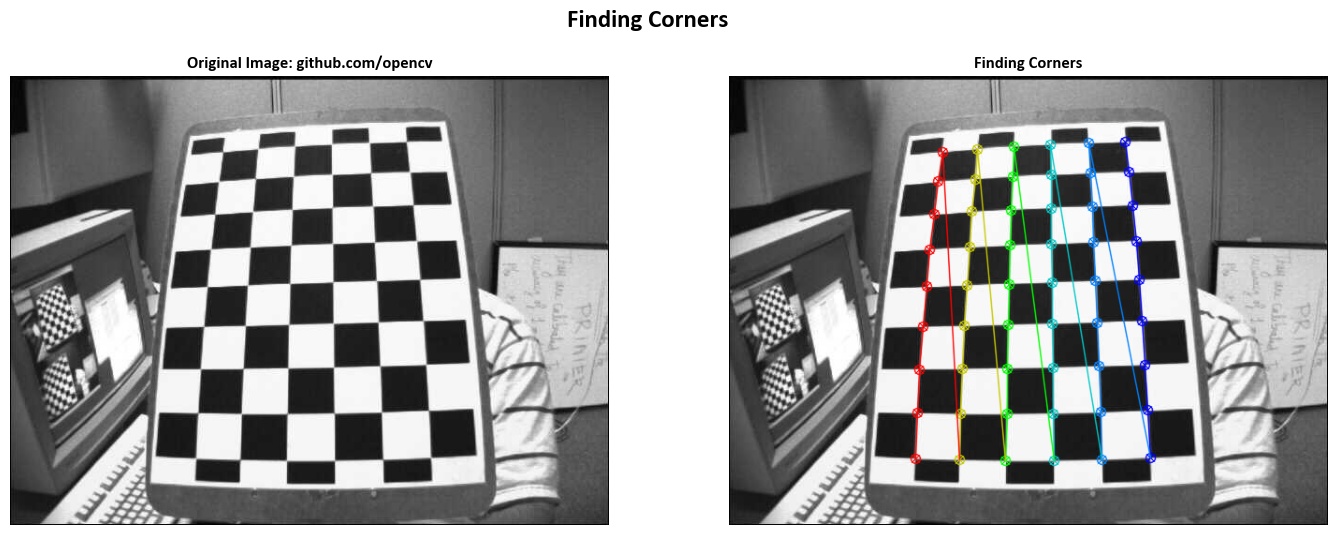

In [7]:
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image from the given URL and convert it to RGB format
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img, cv2.COLOR_GRAY2RGB)

# Create a subplot for displaying original and processed images
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax = ax.ravel()

# Set the title for the overall figure
_ = fig.suptitle('Finding Corners', weight = 'bold', fontsize=18)

# Display the original image on the left subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image: github.com/opencv', weight = 'bold', fontsize=12)

# Termination criteria for corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Number of inside corners along x and y directions on the chessboard
nx = 9
ny = 6

# Convert the image to grayscale
gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Prepare object points in the chessboard pattern
objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Arrays to store object points and image points from the chessboard
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If corners are found, refine and draw them
if ret == True:
    objpoints.append(objp)
    
    # Draw and display the corners on the image
    cv2.drawChessboardCorners(Img, (nx, ny), corners, ret)
    _ = ax[1].imshow(Img)
    
    # Refine the corner positions
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    imgpoints.append(corners2)

# Set the title for the right subplot
_ = ax[1].set_title('Finding Corners', weight = 'bold', fontsize=12)

# Configure plot settings for both subplots
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

# Show the plots
plt.show()

This code retrieves an image from a URL, converts it to RGB format, and then attempts to find the corners of a chessboard pattern in the image. It displays the original image on the left subplot and, if the corners are found, it draws and displays the corners on the right subplot. The corner positions are also refined using the `cv2.cornerSubPix` function.

For the calibration process, the essential tool at our disposal is the [cv2.calibrateCamera()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera) function. This function plays a pivotal role in camera calibration, providing a comprehensive set of results, including the camera matrix, distortion coefficients, as well as rotation and translation vectors, among other critical information. The function serves as the cornerstone for calibrating a camera system, enabling accurate and reliable image analysis in computer vision applications {cite:p}`opencv_library, OpenCVDocumentation`.

Through the `cv2.calibrateCamera()` function, we gain access to the following essential parameters:

- **Camera Matrix**: The camera matrix, which is crucial for undistorting images and contains critical information about the camera's intrinsic properties, such as focal length, principal point, and more.

- **Distortion Coefficients**: These coefficients capture the distortion effects induced by the camera's lens, allowing us to model and correct for both radial and tangential distortions.

- **Rotation and Translation Vectors**: These vectors are integral in translating 3D coordinates to a camera's coordinate system. They play a fundamental role in tasks involving 3D reconstruction and object tracking.

In addition to these core parameters, the `cv2.calibrateCamera()` function may provide other valuable information that is pertinent to the camera's geometric calibration and 3D reconstruction capabilities. The precise determination of these parameters significantly enhances the accuracy and reliability of subsequent computer vision operations.

This function empowers us to calibrate the camera system based on a set of carefully selected calibration images and corresponding known 3D points. By leveraging this calibration data, we can extract the camera's intrinsic and extrinsic properties, paving the way for more precise and consistent image analysis.

For in-depth guidance on how to utilize the `cv2.calibrateCamera()` function and to better understand the process of camera calibration, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera). Mastering the art of camera calibration is essential for achieving accurate and reliable results in computer vision applications, particularly those involving 3D reconstruction and precise spatial analysis.

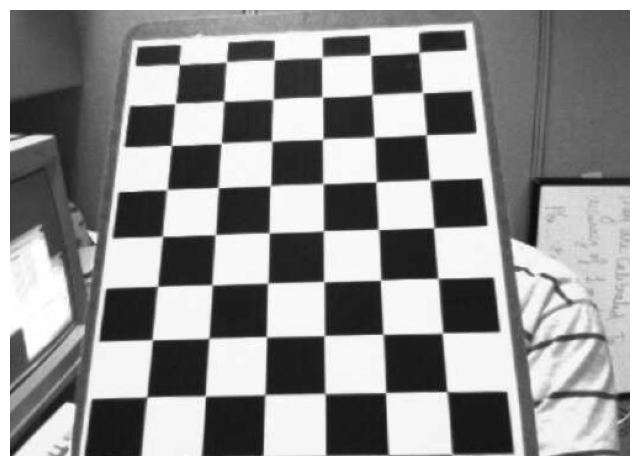

In [8]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

# Calibrate the camera using object points and image points
# 'objpoints' and 'imgpoints' are provided
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Load the image from the given URL and convert it to RGB color
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img, cv2.COLOR_GRAY2RGB)

# Get the dimensions of the image
h, w = Img.shape[:2]

# Get the optimal new camera matrix and the region of interest (ROI) for undistortion
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# Undistort the image using the computed transformation
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), 5)
dst = cv2.remap(Img, mapx, mapy, cv2.INTER_LINEAR)

# Crop the image based on the computed ROI
x, y, w, h = roi
Out = dst[y:y+h, x:x+w]

# Display the undistorted and cropped image using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
_ = ax.imshow(Out)
_ = ax.set_aspect(1)  # Set the aspect ratio to 1 to avoid distortion
_ = ax.axis('off')  # Turn off axis labels and ticks